In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats  
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.dummy import DummyRegressor

In [2]:
data = pd.read_csv("data/kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
irrelevant_columns = ['date',
'view',
'sqft_above',
'sqft_basement',
'yr_renovated',
'lat',
'long',
'sqft_living15',
'sqft_lot15', 'id']

In [6]:
df=data.drop(irrelevant_columns, axis=1).copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,98199.000000


In [9]:
df.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
dtype: int64

In [10]:
df.waterfront.fillna(value=0, inplace = True)

In [11]:
df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
zipcode        0
dtype: int64

In [12]:
for col in df.columns:
    try:
        print(col, df[col].value_counts())
    except:
        print(col, df[col].value_counts())   
    print('\n')

price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: i

In [13]:
print('bedrooms', set(df['bedrooms']))

bedrooms {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33}


In [14]:
print('bathrooms', sorted(set(df['bathrooms'])))

bathrooms [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]


In [15]:
#typo or outlier, need to drop 
df.loc[df['bedrooms']==33,['bathrooms']]

,bathrooms
15856,1.75


In [16]:
df=df.drop(df[df['bedrooms']==33].index).copy()

In [17]:
for col in df.columns:
    try:
        print(col, df[col].nunique())
    except:
        print(col, df[col].nunique())   
    print('\n')

price 3622


bedrooms 11


bathrooms 29


sqft_living 1034


sqft_lot 9776


floors 6


waterfront 2


condition 5


grade 11


yr_built 116


zipcode 70




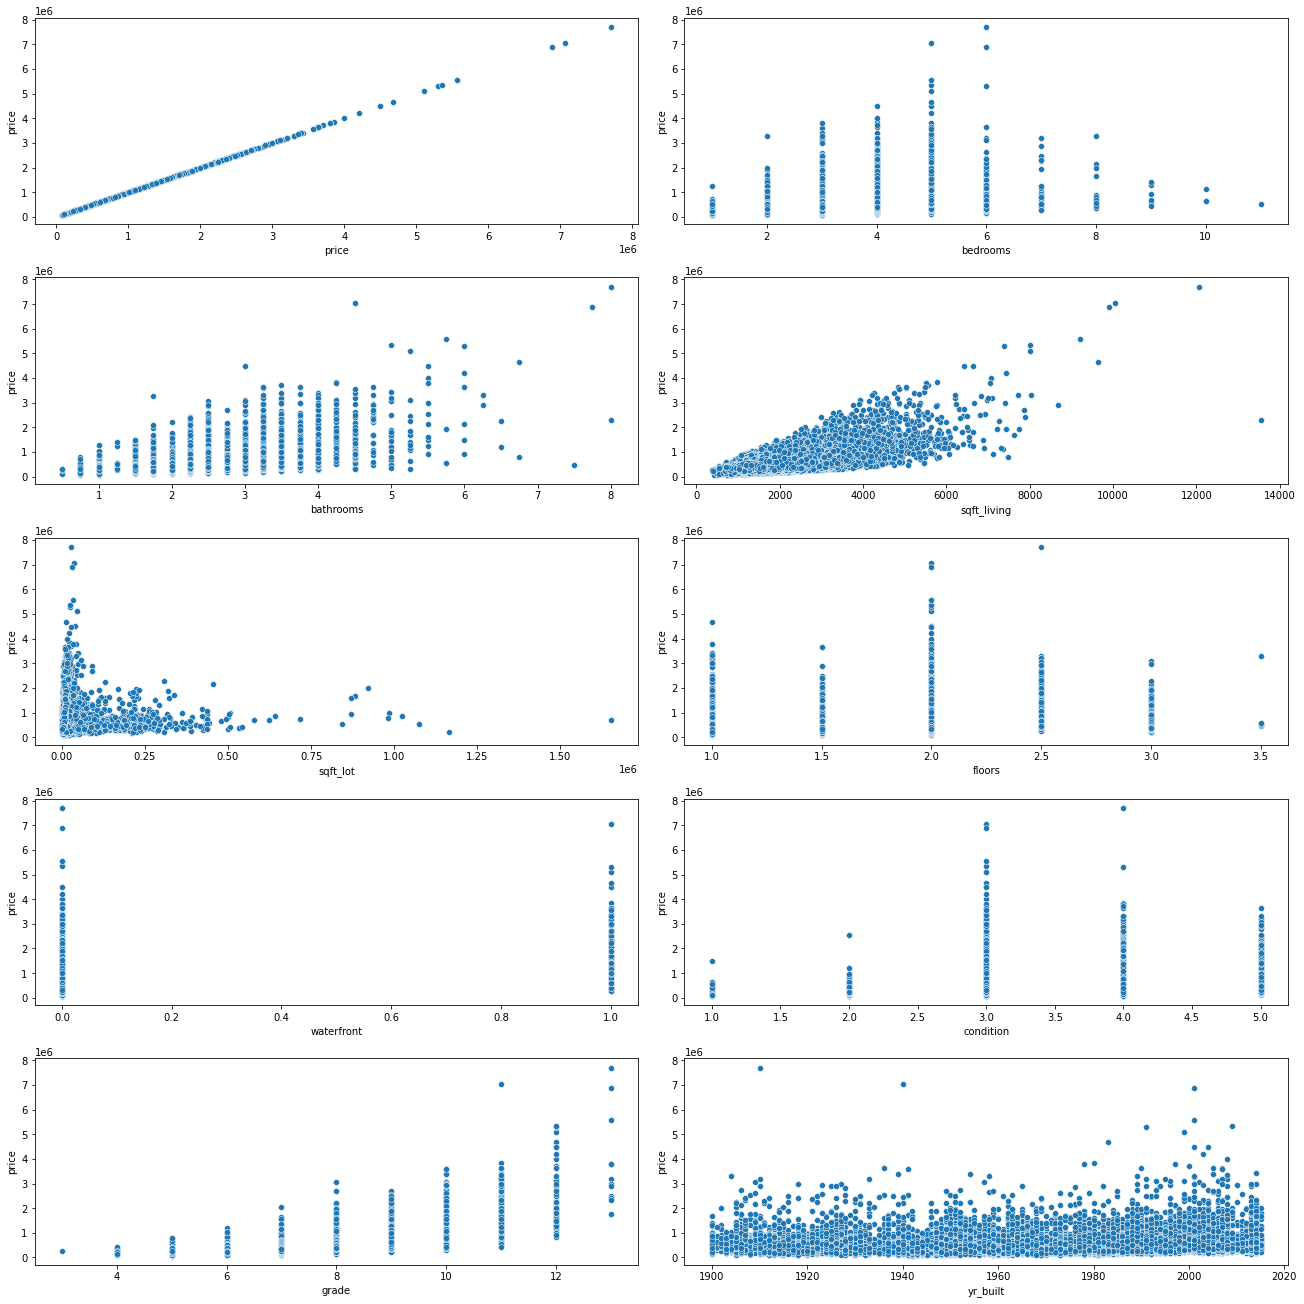

In [18]:
f, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,18) ,constrained_layout=True)
for axx, column in zip(axes.flatten(), df.columns):
    sns.scatterplot(x=df[column], y= df['price'], data=df,ax=axx) 

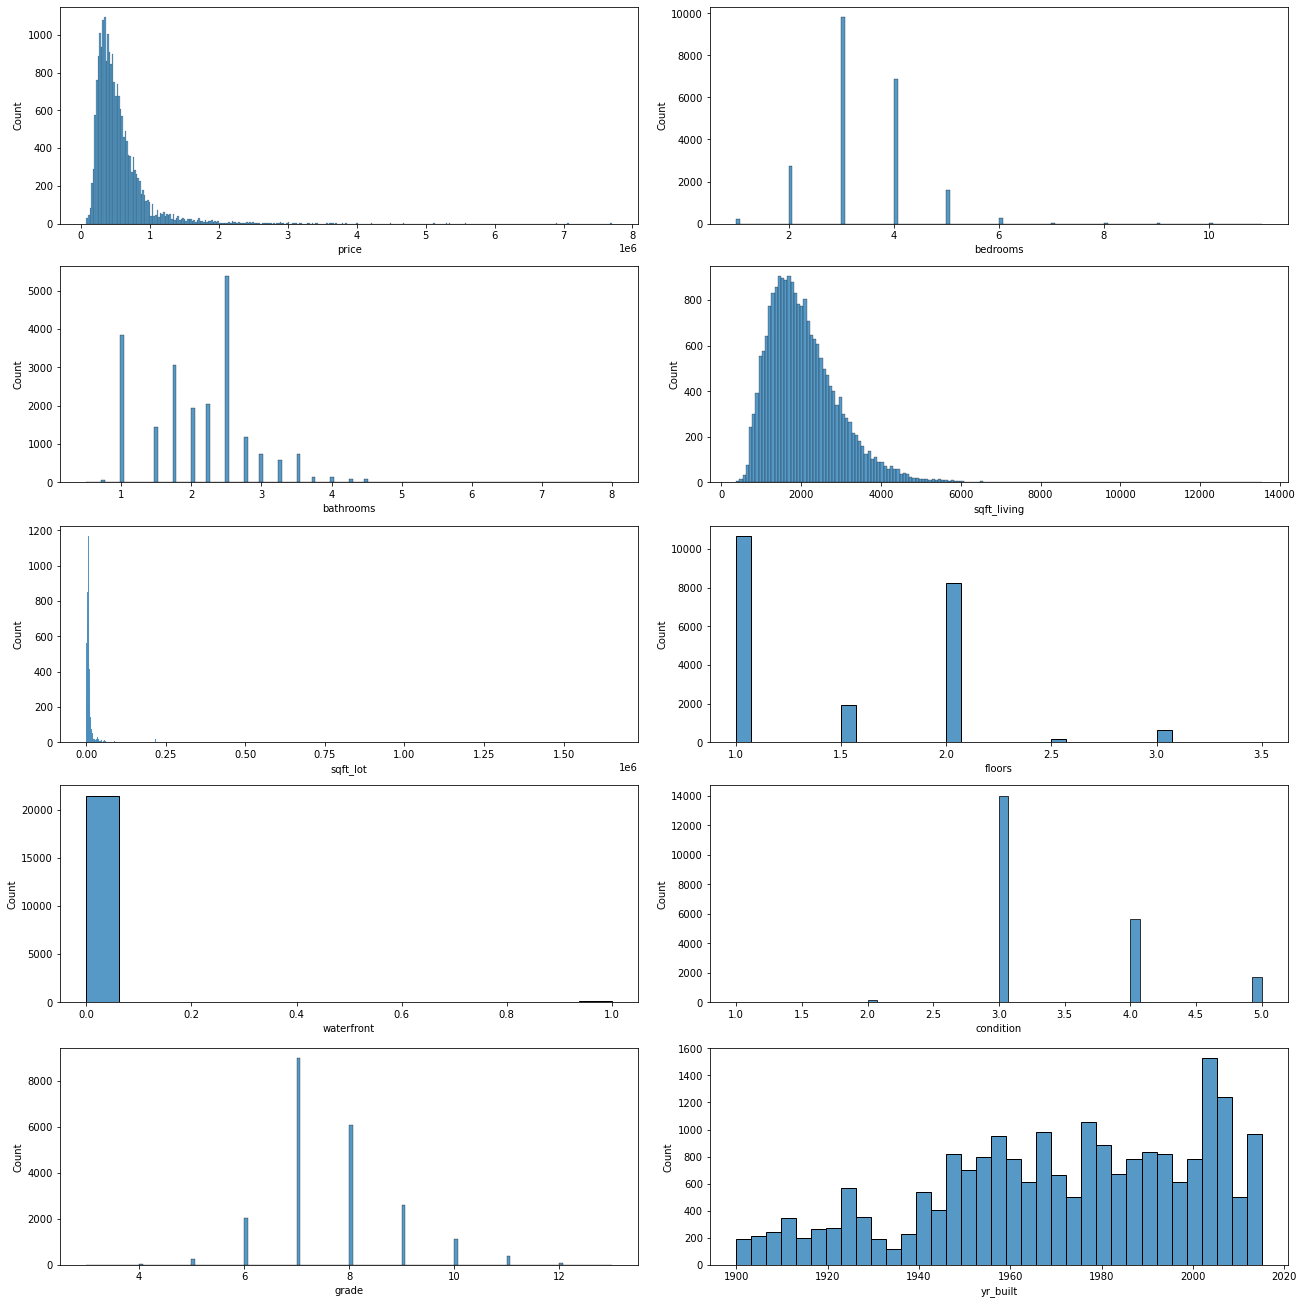

In [19]:
f, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,18) ,constrained_layout=True)

for axx, column in zip(axes.flatten(), df.columns):
    sns.histplot(x=df[column], data=df,ax=axx)
    

In [20]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['sqft_living'].quantile(q=q)))

0.9 percentile: 3255.0
0.91 percentile: 3340.0
0.92 percentile: 3420.0
0.93 percentile: 3510.0
0.94 percentile: 3630.0
0.95 percentile: 3760.0
0.96 percentile: 3920.0
0.97 percentile: 4140.0
0.98 percentile: 4410.0


In [21]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

0.9 percentile: 887000.0
0.91 percentile: 919994.5
0.92 percentile: 950000.0
0.93 percentile: 997967.5
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0


In [22]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['sqft_lot'].quantile(q=q)))

0.9 percentile: 21372.0
0.91 percentile: 24151.70000000002
0.92 percentile: 28506.400000000023
0.93 percentile: 34848.0
0.94 percentile: 37643.5
0.95 percentile: 43308.75
0.96 percentile: 50655.600000000006
0.97 percentile: 67384.89999999978
0.98 percentile: 107157.0


In [23]:
stats.kurtosis(df.sqft_living)

5.250278624437211

In [24]:
stats.skew(df.sqft_living)

1.4730409364724821

In [25]:
stats.skew(df.sqft_lot)

13.071406775919803

kurtosis higher than 3 indicates heavier tails than a normal distribution

In [26]:
stats.kurtosis(df.sqft_lot)

285.4168446506654

A high positive skewness is observed as there are more values on the left side of the 
distribution mean than those on right side, longer tail to the right side 

In [27]:
#will need to log transform later
loglot= np.log(df.sqft_lot)

In [28]:
stats.kurtosis(loglot)

3.3286839377382753

In [29]:
stats.skew(loglot)

0.9623750156615982

In [30]:
#better without log transfomation 
logliv= np.log(df.sqft_living)

In [31]:
stats.kurtosis(logliv)

-0.0793932778715023

In [32]:
stats.skew(logliv)

-0.027409771717033345

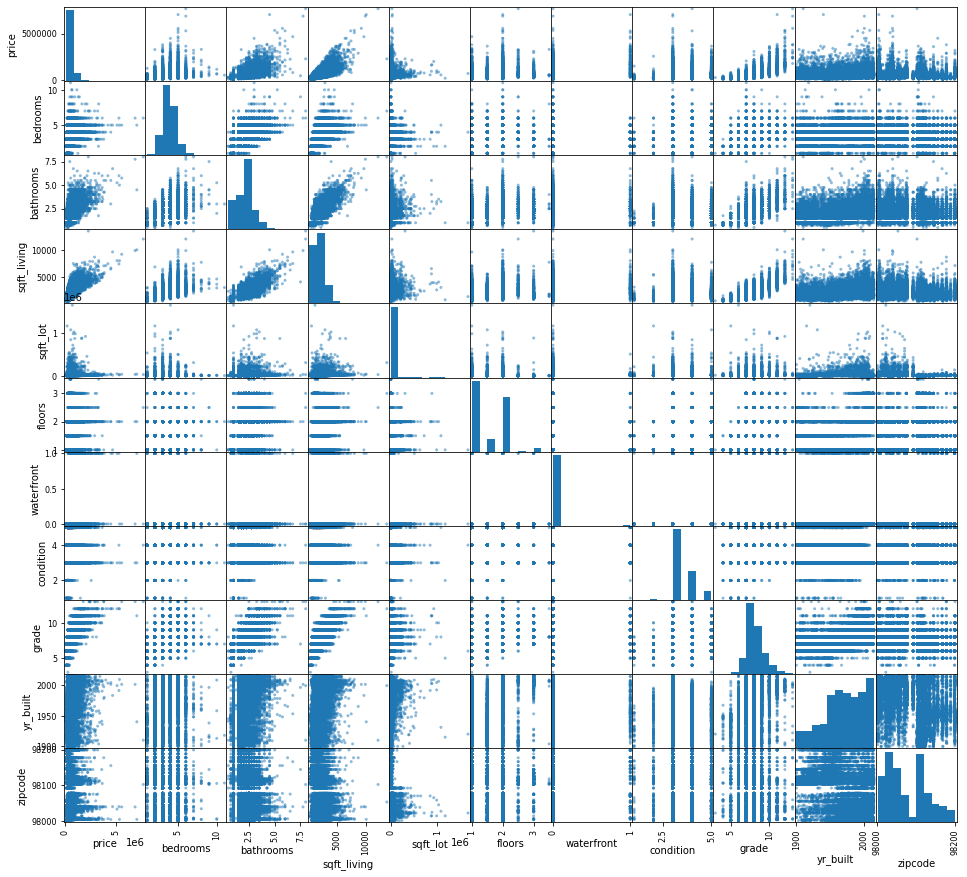

In [33]:
pd.plotting.scatter_matrix(df,figsize  = [16, 15]);

<AxesSubplot:>

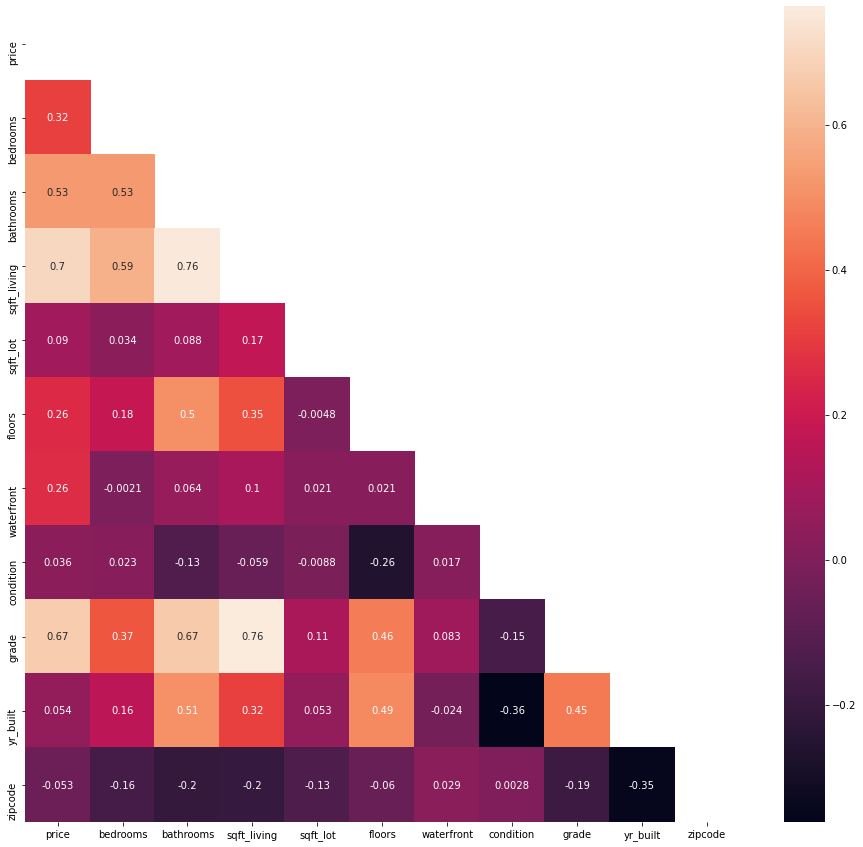

In [34]:
corr= df.corr()
fig, axes = plt.subplots( figsize=(16,15))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype = bool)), annot=True)

In [35]:

#x=df.drop('price', axis=1).copy()
#y=df['price']

#testing for VIF
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.Series(vif, index=x.columns, name="Variance Inflation Factor")            

NameError: name 'x' is not defined

#Binning yr_built
bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels = [1,2,3,4,5,6]
x['yr_built_binned'] = pd.cut(x['yr_built'], bins,labels=labels)

x['yr_built_binned'].isna().sum()

set(x['yr_built_binned'])

In [ ]:
#spliting data into test and train
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#seperating two types of predictors 
categorical=['bedrooms','bathrooms','floors', 'waterfront', 'condition', 'grade','zipcode']
con = ['sqft_living','sqft_lot']

In [ ]:
#creating dummie variables for categorical data
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(df[categorical])
dummies_encoded_train = ohe.transform(df[categorical])
dummies_encoded_train = pd.DataFrame(dummies_encoded_train, columns=ohe.get_feature_names(categorical))


In [ ]:
dummies_encoded_train

In [ ]:
dummies_encoded_test= ohe.transform(x_test[categorical])
dummies_encoded_test = pd.DataFrame(dummies_encoded_test, columns=ohe.get_feature_names(categorical) )

dummies_encoded_train.drop('yr_built_binned_nan', axis=1).copy()

In [ ]:
#log transformation 
#transformer = FunctionTransformer(np.log)
#x_train_lot= transformer.fit_transform(x_train['sqft_lot'])
#x_test_lot= transformer.transform(x_test['sqft_lot'])


In [ ]:
#combine the continuous columns 
#x_train_log = pd.concat([x_train_lot, x_train['sqft_living']], axis=1)
#x_test_log = pd.concat([x_test_lot, x_test['sqft_living']], axis=1)

In [ ]:
#standardized since both continuous columns seem to have gaussian distribution
#scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train_log)
#x_test_scaled = scaler.transform(x_test_log)
#y_train_scaled = scaler.fit_transform(y_train.to_frame())
#y_test_scaled = scaler.transform(y_test.to_frame())

In [ ]:
#y_train_scaled =pd.DataFrame(y_train_scaled, columns= ['price'])
#y_test_scaled = pd.DataFrame(y_test_scaled, columns= ['price'])

In [ ]:
#x_train_scaled =pd.DataFrame(x_train_scaled, columns= ['sqft_living','sqft_lot'])
#x_test_scaled =pd.DataFrame(x_test_scaled, columns= ['sqft_living','sqft_lot'])


non_normal = df['price','sqft_living','sqft_lot']
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))

In [ ]:
x_train_final = pd.concat([x_train_scaled,dummies_encoded_train], axis=1)

In [ ]:
x_train_final.columns=[x.replace('.','_') for x in x_train_final.columns]

In [ ]:
x_train_final

In [ ]:
x_train_final.drop(['bedrooms_1','bathrooms_0_5', 'floors_1_0', 'waterfront_0_0', 'condition_1', 'grade_3'], axis =1, inplace =True)

In [ ]:
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
testmodel = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(testmodel, cv=splitter)
selector.fit(x_train_final,y_train_scaled)

# Print the results
print("Was the column selected?")
for index, col in enumerate(x_train_final.columns):
    print(f"{col}: {selector.support_[index]}")

In [ ]:
train_final=  pd.concat([y_train_scaled,x_train_final], axis=1)
train_final

In [ ]:
train_final.isna().sum()

In [ ]:
pd.set_option("display.max_rows", 66, "display.max_columns", 66)
corr= train_final.corr()
corr

In [ ]:
from statsmodels.tools.tools import add_constant

X = add_constant(x_train_final)

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.Series(vif, index=X.columns, name="Variance Inflation Factor") 


In [ ]:
train_final.shape

In [ ]:
x_train_final.columns

In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train_final, y_train_scaled)
DummyRegressor()
dummy_regr.predict(x_train_final)
dummy_regr.score(x_train_final, y_train_scaled)

In [ ]:
outcome = 'price'
predictors = x_train_final
formula = outcome + '~' + "+".join(predictors.columns)
model = smf.ols(formula=formula, data=train_final).fit()
model.summary()

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,x_train_final, y_train_scaled, cv=3)

In [ ]:
#selecting only the ones that are statistically significant 
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

outcome = 'price'
predictors2 ='floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0', 'floors_3_5','condition_1', 'condition_2','condition_3'
formula = outcome + '~' + "+".join(predictors2)
model1 = smf.ols(formula=formula, data=train_final).fit()
model1.summary()


In [ ]:
outcome = 'price'
predictors ='sqft_living'
formula = outcome + '~' + predictors
model2 = smf.ols(formula=formula, data=x_train_final).fit()
model2.summary()


In [ ]:
outcome = 'price'
predictors ='sqft_lot'
formula = outcome + '~' + predictors
model3 = smf.ols(formula=formula, data=train_final).fit()
model3.summary()

fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model1, 'sqft_living', fig=fig)

residuals = model1.resid
residuals

preds1 = model1.predict(train_final['sqft_living'])
preds1

fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

plt.scatter(preds1 , model1.resid)
plt.plot(preds1, [0 for i in range(len(train_final))])

third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

final_model = LinearRegression()

final_model.fit(X_train_final, y_train)

final_model.score(X_test_final, y_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)